### Objectives
Use lambda functions and DataFrame methods to transform data
Handle missing data

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

### More Pandas
Suppose you were interested in opening an animal shelter. To inform your planning, it would be useful to analyze data from other shelters to understand their operations. In this lecture, we'll analyze animal outcome data from the Austin Animal Center.

### Loading the Data
Let's take a moment to examine the Austin Animal Center data set.

We can also ingest the data right off the web, as we do below. The code below will load JSON data for the last 1000 animals to leave the center from this JSON file.

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_stdlib_context ##prevents json error of ssl
#urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123) '
json_url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
animals = pd.read_json(json_url)

### Exploratory Data Analysis (EDA)
Exploring a new dataset is essential for understanding what it contains. This will generate ideas for processing the data and questions to try to answer in further analysis.

### Inspecting the Data
Let's take a look at a few rows of data.

In [3]:
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,NaN
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN
3,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN
4,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN


The info() and describe() provide a useful overview of the data.

In [4]:
animals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         1000 non-null   object        
 1   name              741 non-null    object        
 2   datetime          1000 non-null   datetime64[ns]
 3   monthyear         1000 non-null   object        
 4   date_of_birth     1000 non-null   object        
 5   outcome_type      1000 non-null   object        
 6   animal_type       1000 non-null   object        
 7   sex_upon_outcome  1000 non-null   object        
 8   age_upon_outcome  1000 non-null   object        
 9   breed             1000 non-null   object        
 10  color             1000 non-null   object        
 11  outcome_subtype   458 non-null    object        
dtypes: datetime64[ns](1), object(11)
memory usage: 93.9+ KB


We see have some missing data.specifically in the `'name'` and `'outcome_subtype'` columns

In [5]:
animals.describe()

<ipython-input-5-3885fd60d0c1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  animals.describe()


,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
count,1000,741,1000,1000,1000,1000,1000,1000,1000,1000,1000,458
unique,998,665,999,999,885,7,4,5,40,225,128,14
top,A788817,Zeus,2019-03-11 00:00:00,2019-03-11T00:00:00.000,2016-05-01T00:00:00.000,Adoption,Dog,Neutered Male,2 years,Domestic Shorthair Mix,Black/White,Partner
freq,2,5,2,2,4,504,570,358,177,201,91,218
first,NaN,NaN,2013-10-03 16:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2024-07-18 18:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# use value counts to check a categorical feature's distribution
animals['color'].value_counts()

Black/White           91
Black                 85
Brown Tabby           62
Brown Tabby/White     38
Brown                 38
                      ..
Gray Tabby             1
White/Red              1
Sable/Cream            1
Torbie/Brown Tabby     1
Black Smoke            1
Name: color, Length: 128, dtype: int64

Now that we have a sense of the data available to us, we can focus in on some more specific questions to dig into. These questions may or may not be directly relevant to your goal (e.g. helping plan a new shelter), but will always help you gain a better understanding of your data.

In your EDA notebooks, **markdown** will be especially helpful in tracking these questions and your methods of answering the questions.

### Question 1: What animal types are in the dataset?
We can then begin thinking about what parts of the DataFrame we need to answer the question.


What features do we need?
- animal-type

What type of logic and calculation do we perform?
-use .value_counts to count the different animal types

What type of visualization would help us answer the question?
- A bar chart would be good for this purpose


In [11]:
animals['animal_type'].value_counts()

Dog      570
Cat      378
Other     49
Bird       3
Name: animal_type, dtype: int64

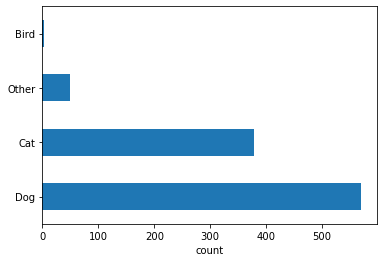

In [18]:
#my code
fig, ax = plt.subplots()
ax = animals.animal_type.value_counts().plot(kind='barh')
ax.set_xlabel('count');

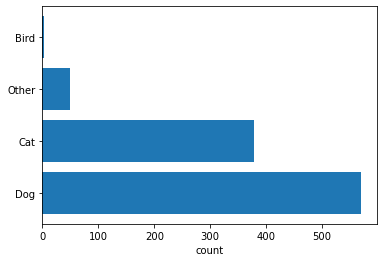

In [29]:
#Teachers code
fig, ax = plt.subplots()
animal_type_values = animals['animal_type'].value_counts()
ax.barh(
    y = animal_type_values.index,
    width = animal_type_values.values
)
ax.set_xlabel('count');

<AxesSubplot:>

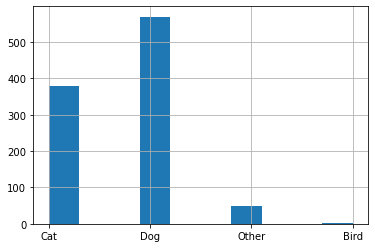

In [27]:
# Histogram
animals['animal_type'].hist()

Questions lead to other questions. For the above example, the visualization raises the question...

### Question 2: What "Other" animals are in the dataset?
To find out, we need to know whether the type of animal for "Other" is in our dataset - and if so, where to find it.

**Discussion**: Where might we look to find animal types within the Other category?
Answer The breed column.

In [40]:
mask_other_animals = animals['animal_type'] == 'Other'
animals[mask_other_animals]['breed'].value_counts()

Bat Mix           13
Bat               12
Raccoon Mix        5
Raccoon            4
Guinea Pig         4
Guinea Pig Mix     3
Rabbit Sh Mix      2
Opossum            1
Polish             1
Lizard             1
Ferret Mix         1
Rabbit Sh          1
Chinchilla         1
Name: breed, dtype: int64

### Question 3: How old are the animals in our dataset?

In [65]:
animals['age_upon_outcome'].value_counts()

2 years      177
1 year       167
2 months     128
3 years       60
3 months      59
1 month       53
4 years       37
4 months      36
6 months      27
6 years       21
7 years       21
5 years       18
8 years       18
5 months      16
8 months      14
2 weeks       13
3 weeks       12
9 years       12
7 months      12
9 months      12
10 years      11
4 weeks       10
10 months     10
11 years       8
1 weeks        7
12 years       7
6 days         5
15 years       4
1 day          4
13 years       4
5 days         3
1 week         3
16 years       2
2 days         2
3 days         2
4 days         1
14 years       1
11 months      1
0 years        1
5 weeks        1
Name: age_upon_outcome, dtype: int64

we note the different units of age
### Series.map()
The .map() method applies a transformation to every entry in the Series. This transformation "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary - usually we'll use functions.

The `'.apply()'` method is similar to the .map() method for Series, but can only `'use functions'`. It has more powerful uses when working with DataFrames.

In [71]:
def one_year(age):
    if age == '1 year':
        return '1 years'
    else:
        return age
    
animals['new_age1'] = animals['age_upon_outcome'].map(one_year)
animals['new_age1'].value_counts()

2 years      177
1 years      167
2 months     128
3 years       60
3 months      59
1 month       53
4 years       37
4 months      36
6 months      27
6 years       21
7 years       21
5 years       18
8 years       18
5 months      16
8 months      14
2 weeks       13
3 weeks       12
9 years       12
7 months      12
9 months      12
10 years      11
4 weeks       10
10 months     10
11 years       8
1 weeks        7
12 years       7
6 days         5
15 years       4
1 day          4
13 years       4
5 days         3
1 week         3
16 years       2
2 days         2
3 days         2
4 days         1
14 years       1
11 months      1
0 years        1
5 weeks        1
Name: new_age1, dtype: int64

### More Sophisticated Mapping
Let's use .map() to turn sex_upon_outcome into a category with three values (called ternary): male, female, or unknown.

First, explore the unique values:

In [76]:
animals['sex_upon_outcome'].unique()

array(['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female',
       'Intact Female'], dtype=object)

In [86]:
def sex_mapper(status):
    if status in ['Neutered Male','Intact Male']:
        return 'Male'
    elif status in ['Spayed Female','Intact Female']:
        return 'Female'
    else:
        return 'Unknown'
    

In [87]:
animals['new_sex1'] = animals['sex_upon_outcome'].map(sex_mapper)
animals['new_sex1']

0         Male
1         Male
2         Male
3      Unknown
4         Male
        ...   
995       Male
996       Male
997     Female
998       Male
999     Female
Name: new_sex1, Length: 1000, dtype: object

In [88]:
animals.loc[:,['sex_upon_outcome','new_sex1']]

,sex_upon_outcome,new_sex1
0,Neutered Male,Male
1,Neutered Male,Male
2,Neutered Male,Male
3,Unknown,Unknown
4,Neutered Male,Male
...,...,...
995,Neutered Male,Male
996,Intact Male,Male
997,Intact Female,Female
998,Neutered Male,Male


### Lambda Functions
Simple functions can be defined just when you need them, when you would call the function. These are called lambda functions. These functions are anonymous and disappear immediately after use.

Let's use a lambda function to get rid of 'Other' in the "animal_type' column.

In [94]:
animals[animals['animal_type'] == 'Other']

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_sex1
3,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN,1 years,Unknown
28,A725795,NaN,2016-05-03 12:39:00,2016-05-03T12:39:00.000,2016-04-15T00:00:00.000,Euthanasia,Other,Unknown,2 weeks,Opossum,Gray,Underage,2 weeks,Unknown
40,A766700,NaN,2018-02-15 08:59:00,2018-02-15T08:59:00.000,2017-02-15T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk,1 years,Unknown
46,A765701,NaN,2018-01-25 09:39:00,2018-01-25T09:39:00.000,2017-01-25T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk,1 years,Unknown
53,A730464,NaN,2016-07-05 12:47:00,2016-07-05T12:47:00.000,2015-07-05T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat,Black/Brown,Rabies Risk,1 years,Unknown
59,A806497,*Moo,2019-12-17 17:59:00,2019-12-17T17:59:00.000,2019-06-02T00:00:00.000,Adoption,Other,Spayed Female,6 months,Polish,White/White,NaN,6 months,Female
72,A757815,NaN,2017-09-07 11:00:00,2017-09-07T11:00:00.000,2015-09-07T00:00:00.000,Euthanasia,Other,Unknown,2 years,Raccoon,Gray/Black,Rabies Risk,2 years,Unknown
93,A734055,NaN,2016-09-01 08:05:00,2016-09-01T08:05:00.000,2015-08-31T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Brown,Rabies Risk,1 years,Unknown
94,A709257,NaN,2015-08-07 08:35:00,2015-08-07T08:35:00.000,2014-08-06T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat Mix,Black,Rabies Risk,1 years,Unknown
100,A727851,NaN,2016-05-26 18:09:00,2016-05-26T18:09:00.000,2014-05-26T00:00:00.000,Euthanasia,Other,Unknown,2 years,Bat Mix,Brown/Black,Rabies Risk,2 years,Unknown


In [95]:
animals['animal_type'].value_counts()

Dog      570
Cat      378
Other     49
Bird       3
Name: animal_type, dtype: int64

In [98]:
animals['animal_type'].map(lambda x: np.nan if x=='Other' else x).value_counts()

Dog     570
Cat     378
Bird      3
Name: animal_type, dtype: int64

In [99]:
#If u want to overwrite the cell
#animals['animal_type'] = animals['animal_type'].map(lambda x: np.nan if x=='Other' else x)

### Handling Missing Data
A lot of the times we'll have missing information in our data set. This can sometimes be troublesome in what we're trying to do.

So far, we've been doing some preprocessing/cleaning to answer questions. Now we're going to handle the missing values in our data.

There are a few strategies we can choose from and they each have their special use case.

Before making changes, it's convenient to make changes to a copy instead of overwriting data. We'll keep all our changes in animals_clean which will be a copy of the original DataFrame.

In [100]:
animals_clean = animals.copy()

### Fill with a Relevant Value
A lot of times we already have an idea of how we want to specify that a value was missing and replace it with a value that makes more sense than an "empty" value.

For example, it might make sense to fill the value as "MISSING" or "UNKNOWN". This way it's clearer when do more analysis.

We can use Pandas' fillna() method to replace missing values with something specific

In [101]:
animals['name']

0      *Hamilton
1          Chunk
2          Gizmo
3            NaN
4          Moose
         ...    
995         Gato
996         Baby
997        *Lily
998      *Austin
999         Lola
Name: name, Length: 1000, dtype: object

In [103]:
# Note this creates a copy of `animals` with the missing values replaced
animals_name_filled = animals.fillna({'name':'UNKNOWN'}) # {col_name:new_value}
animals_name_filled.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_sex1
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,NaN,3 months,Male
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN,2 years,Male
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN,1 years,Male
3,A821648,UNKNOWN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN,1 years,Unknown
4,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN,4 months,Male


In [104]:
# `animals` DataFrame is left untouched
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_sex1
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,NaN,3 months,Male
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN,2 years,Male
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN,1 years,Male
3,A821648,NaN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN,1 years,Unknown
4,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN,4 months,Male


In [106]:
#Alternative way to fill missing values by specifying column(s) forst
animals_only_names = animals[['name']].fillna(value='UNKNOWN')
animals_only_names.head()

,name
0,*Hamilton
1,Chunk
2,Gizmo
3,UNKNOWN
4,Moose


In [109]:
# To keep changes in dataframe, overwrite the column
animals_clean[['name']] = animals_only_names
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_sex1
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,NaN,3 months,Male
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN,2 years,Male
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN,1 years,Male
3,A821648,UNKNOWN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,NaN,1 years,Unknown
4,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN,4 months,Male


### Fill with a Reasonable Value
Other times we don't know what the missing value was but we might have a reasonable guess. This allows us to still use the data point (row) in our analysis.

- Beware that filling in missing values can lead to you drawing incorrect conclusions. If most of the data from a column are missing, it's going to appear that the value you filled it in with is more common that it actually was!

A lot of the time we'll use the mean or median for numerical values. Sometimes values like 
 make sense since it might make sense in the context of how the data was collected.

With categorical values, you might choose to fill the missing values with the most common value (the **mode**).

- Similar to the previous subsection, we can use the `'fillna()'` method after specifying the value to fill

In [116]:
#lets find the most common value for 'outcome subtype'
outcome_subtype_counts = animals['outcome_subtype'].value_counts()
outcome_subtype_counts

Partner        218
Foster         122
Rabies Risk     27
Snr             23
Suffering       23
SCRP            13
In Kennel       12
Out State        9
Offsite          4
Aggressive       2
Field            2
Underage         1
Emergency        1
Enroute          1
Name: outcome_subtype, dtype: int64

In [120]:
# This gets us just the values in order of most freqent to the least frequent
outcome_subtype_ordered = outcome_subtype_counts.index
print(outcome_subtype_ordered)

# Get the first one
most_common_outcome_subtype = outcome_subtype_ordered[0]
most_common_outcome_subtype

Index(['Partner', 'Foster', 'Rabies Risk', 'Snr', 'Suffering', 'SCRP',
       'In Kennel', 'Out State', 'Offsite', 'Aggressive', 'Field', 'Underage',
       'Emergency', 'Enroute'],
      dtype='object')


'Partner'

In [127]:
# also do this by using mode
most_common_outcome_subtype = animals['outcome_subtype'].mode()[0]
most_common_outcome_subtype


'Partner'

In [128]:
#similar to the previous subsection, we can use fillna() and update the DF
animals_clean['outcome_subtype'] = animals_clean['outcome_subtype'].fillna(most_common_outcome_subtype)
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_sex1
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,Partner,3 months,Male
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,Partner,2 years,Male
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,Partner,1 years,Male
3,A821648,UNKNOWN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,Partner,1 years,Unknown
4,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,Partner,4 months,Male


### Specify That the Data Were Missing
Even after filling in missing values, it might make sense to specify that there were missing data. You can document that the data was missing by creating a new column that represents whether the data was originally missing or not.

This can be helpful when you suspect that the fact the data was missing could be important for an analysis.

Since we already removed some missing values, we're going to reference back to the original animals DataFrame. (Good thing we didn't overwrite it! 😉)

In [130]:
missing_outcome_subtypes = animals['outcome_subtype'].isna()
missing_outcome_subtypes

0       True
1       True
2       True
3       True
4       True
       ...  
995     True
996    False
997    False
998    False
999     True
Name: outcome_subtype, Length: 1000, dtype: bool

In [131]:
# Create new column for missing outcome subtypes matched w/ replaced values
animals_clean['outcome_subtype_missing'] = missing_outcome_subtypes
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_sex1,outcome_subtype_missing
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,Partner,3 months,Male,True
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,Partner,2 years,Male,True
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,Partner,1 years,Male,True
3,A821648,UNKNOWN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,Partner,1 years,Unknown,True
4,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,Partner,4 months,Male,True


In [133]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         1000 non-null   object        
 1   name              741 non-null    object        
 2   datetime          1000 non-null   datetime64[ns]
 3   monthyear         1000 non-null   object        
 4   date_of_birth     1000 non-null   object        
 5   outcome_type      1000 non-null   object        
 6   animal_type       1000 non-null   object        
 7   sex_upon_outcome  1000 non-null   object        
 8   age_upon_outcome  1000 non-null   object        
 9   breed             1000 non-null   object        
 10  color             1000 non-null   object        
 11  outcome_subtype   458 non-null    object        
 12  new_age1          1000 non-null   object        
 13  new_sex1          1000 non-null   object        
dtypes: datetime64[ns](1), obj

### Drop Missing Data
You should try to keep as much relevant data as possible, but sometimes the other methods don't make as much sense and it's better to remove or drop the missing data.

We typically drop missing data if very little data would be lost and/or trying to fill in the values wouldn't make sense for our use case. For example, if you're trying to predict the outcome based on the other features/columns it might not make sense to fill in those missing values with something you can't confirm.

We noticed that outcome_type had only two missing values. It might not be worth trying to handle those two missing values. We can pretend that the outcome_type was an important feature and without it the rest of the row's data is of little importance to us.

So we'll decide to drop the row if a value from outcome_type is missing. We'll use Pandas' dropna() method.

In [135]:
# in my case that column was not missig values
# This will drop any row (axis=0) or column (axis=1) that has missing values
animals_clean = animals_clean.dropna( # Note we're overwriting animals_clean
    axis=0, # This is the default & will drop rows; axis=1 for cols
    subset=['outcome_type'] # Specific labels to consider (defaults to all)
)
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_sex1,outcome_subtype_missing
0,A882831,*Hamilton,2023-07-01 18:12:00,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,Partner,3 months,Male,True
1,A794011,Chunk,2019-05-08 18:20:00,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,Partner,2 years,Male,True
2,A776359,Gizmo,2018-07-18 16:02:00,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,Partner,1 years,Male,True
3,A821648,UNKNOWN,2020-08-16 11:38:00,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,Partner,1 years,Unknown,True
4,A720371,Moose,2016-02-13 17:59:00,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,Partner,4 months,Male,True


In [136]:
len(animals_clean)

1000

### Comparing Before and After
We can now see all the work we did!

In [137]:
#Original data
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         1000 non-null   object        
 1   name              741 non-null    object        
 2   datetime          1000 non-null   datetime64[ns]
 3   monthyear         1000 non-null   object        
 4   date_of_birth     1000 non-null   object        
 5   outcome_type      1000 non-null   object        
 6   animal_type       1000 non-null   object        
 7   sex_upon_outcome  1000 non-null   object        
 8   age_upon_outcome  1000 non-null   object        
 9   breed             1000 non-null   object        
 10  color             1000 non-null   object        
 11  outcome_subtype   458 non-null    object        
 12  new_age1          1000 non-null   object        
 13  new_sex1          1000 non-null   object        
dtypes: datetime64[ns](1), obj

In [138]:
#missing data cleaned
animals_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   animal_id                1000 non-null   object        
 1   name                     1000 non-null   object        
 2   datetime                 1000 non-null   datetime64[ns]
 3   monthyear                1000 non-null   object        
 4   date_of_birth            1000 non-null   object        
 5   outcome_type             1000 non-null   object        
 6   animal_type              1000 non-null   object        
 7   sex_upon_outcome         1000 non-null   object        
 8   age_upon_outcome         1000 non-null   object        
 9   breed                    1000 non-null   object        
 10  color                    1000 non-null   object        
 11  outcome_subtype          1000 non-null   object        
 12  new_age1                 1000 non-n

### Level Up: .applymap()
.applymap() is used to apply a transformation to each element of a DataFrame.

In [139]:
# This line will apply the base `type()` function to 
# all entries of the DataFrame.
animals.applymap(type)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age1,new_sex1
0,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>
2,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'float'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>
996,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
997,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
998,<class 'str'>,<class 'str'>,<class 'pandas._libs.tslibs.timestamps.Timesta...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


### Level Up: Faster NumPy Methods
In general, np.where() and np.select() are faster than map(). This won't matter too much with reasonably-sized data but can be a consideration for big data.

In [143]:
animals['new_age2'] = np.where(animals['age_upon_outcome'] == '1 year',
                              '1 years', animals['age_upon_outcome'])
animals['new_age2']

0      3 months
1       2 years
2       1 years
3       1 years
4      4 months
         ...   
995     4 years
996     2 years
997     5 weeks
998     1 years
999    3 months
Name: new_age2, Length: 1000, dtype: object

In [144]:
# Check we got the same results with np.where()
(animals['new_age1'] != animals['new_age2']).sum()

0

In [149]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit animals['new_age1'] = animals['age_upon_outcome'].map(one_year)

238 µs ± 3.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [150]:
# Let's time how long it takes np.where() to run by running it multiple times
%timeit animals['new_age2'] = np.where(animals['age_upon_outcome'] == '1 year',\
'1 years',animals['age_upon_outcome'])

225 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### NumPy's select() Method
Again, numpy will be faster:

In [151]:
conditions = [animals['sex_upon_outcome'] == 'Neutered Male',
             animals['sex_upon_outcome'] == 'Intact Male',
             animals['sex_upon_outcome'] == 'Spayed Female',
             animals['sex_upon_outcome'] == 'Intact Female',
             animals['sex_upon_outcome'] == 'Unknown',
             animals['sex_upon_outcome'] == 'NULL']
choices = ['Male', 'Male', 'Female', 'Female', 'Unknown', 'Unknown']

In [152]:
animals['new_sex2'] = np.select(conditions, choices)
animals['new_sex2']

0         Male
1         Male
2         Male
3      Unknown
4         Male
        ...   
995       Male
996       Male
997     Female
998       Male
999     Female
Name: new_sex2, Length: 1000, dtype: object

In [153]:
# Check we got the same results with np.where()
(animals['new_sex1'] != animals['new_sex2']).sum()

0

In [154]:
# Let's time how long it takes .map() to run by running it multiple times
%timeit animals['new_sex1'] = animals['sex_upon_outcome'].map(sex_mapper)

291 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [155]:
# Let's time how long it takes np.select() to run by running it multiple times
%timeit animals['new_sex2'] = np.select(conditions, choices)

257 µs ± 7.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
